._00154_940128_fb.png
00339_940422_fb.png
D:\MorphingDB\data\FERET\bonafide_probe\00339_940422_fb.png
torch.Size([959, 721, 3])


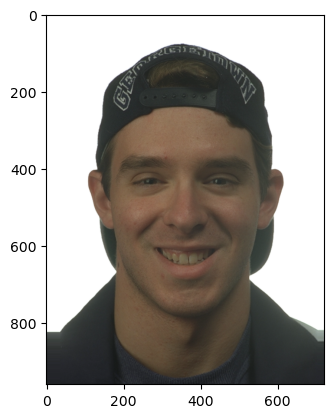

In [10]:
import torch as th
import matplotlib.pyplot as mpl
import numpy as np
from torchvision.io import read_image, ImageReadMode
from PIL import Image
import os
import random

path = 'D:\\MorphingDB\\data\\FERET\\bonafide_probe'

# random img
img = random.choice(os.listdir(path))
print(img)

# first img
img = os.listdir(path)[0]
print(img)

img_path = os.path.join(path, img)
# img_path = os.path.join(path, '._00737_941201_rc.png') ._00339_940422_fb.png
print(img_path)

# img = Image.open(img_path)
# print('W,H =',img.size)
# print(type(img))

img = read_image(img_path, mode=ImageReadMode.UNCHANGED)
img = img/255.0
img = img.to(th.float32)
img = img.permute(1,2,0) # H x W x C
print(img.size())
mpl.imshow(img)


In [13]:
os.listdir(path)[:5]

['00339_940422_fb.png',
 '._00339_940422_fb.png',
 '00044_931230_fb.png',
 '00771_960530_fb.png',
 '._00044_931230_fb.png']

In [14]:
import os

def filename_replacer(filename):
  fname, fext = os.path.splitext(filename)
  return fname.replace(".", "_") + fext

In [15]:
name = os.listdir(path)[1]
filename_replacer(name)

'__00339_940422_fb.png'

In [2]:
img.min(), img.max()

(tensor(0.0784), tensor(1.))

In [3]:
import os
from PIL import Image
import torch as th
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.io import read_image , ImageReadMode

class FeretDataset(th.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = os.listdir(data_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image
    
    def load_image(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        """Reading img"""
        print(self.imgs_dir, self.imgs[idx])
        # img_path = os.path.join(self.imgs_dir, image_path)
        image = read_image(img_name)
        image = image/255.0
        image = image.to(th.float32)
        image = image.permute(2, 0 ,1)
        # image = np.transpose(image, (2,0,1))
        # image = image.astype(np.float32)
        # image = th.from_numpy(image)
        return image

In [23]:
trans = transforms.Compose([
                            transforms.Resize(size=(200,200)),
                            transforms.ToTensor(),
                           # transforms.PILToTensor()
                            ])
 
dataset = FeretDataset(data_dir=path, 
                       transform=trans
                       )

loader = DataLoader(dataset, batch_size=10)

In [26]:
x = next(iter(loader))
x.size()

torch.Size([10, 3, 200, 200])

In [2]:
from Dataloader.Dataloader import train_loader
x = next(iter(train_loader))
x.size()

torch.Size([10, 3, 200, 200])

In [2]:
import pandas as pd
import numpy as np
import os

path = "C:\\Users\\BenaventeD\\data\\s-mad-dataset\\FERET\\npp\\dataset_test"

print(os.listdir(path=path))

['mtcnn_bonafide', 'mtcnn_morphs_facefusion', 'mtcnn_morphs_facemorpher', 'mtcnn_morphs_opencv', 'mtcnn_morphs_ubo', 'mtcnn_morphs_utw']


In [109]:
dataset = np.array([])
int_classes = np.array([])
folders = os.listdir(path)
test = np.array([])
for folder in folders[:5]:
    folder_path = os.path.join(path, folder)
    files = os.listdir(folder_path)
    files = np.array(files)
    # dataset = np.append(dataset, files)
    for file in files:
        file_path = os.path.join(folder, file)
        dataset = np.append(dataset, file_path)
    # #     classes = np.full(len(dataset),
    # #             fill_value=0,
    # #             dtype=np.int8)
    # # # for elem in zip(dataset, int_classes):
    # # #     print(elem)
    # # #     break


In [143]:
data_frame = pd.DataFrame(dataset, columns=['img'])
# data_frame.sample(2)
data_frame.head(3)


,img
0,mtcnn_bonafide\00002_940928_fa.png
1,mtcnn_bonafide\00003_931230_fa_a.png
2,mtcnn_bonafide\00005_941121_fa.png


In [144]:
data_frame[528:530]

,img
528,mtcnn_bonafide\01208_940128_fa_a.png
529,mtcnn_morphs_facefusion\00002_940928_fb.png_vs...


In [170]:
other_frame = data_frame.img.str.split('\\',n=1, expand=True)
# other_frame.head(2)
data_frame['folder'] = other_frame[:][0]
data_frame['file'] = other_frame[:][1]
# pd.concat([data_frame, other_frame], axis=1)
data_frame

,img,folder,file
0,mtcnn_bonafide\00002_940928_fa.png,mtcnn_bonafide,00002_940928_fa.png
1,mtcnn_bonafide\00003_931230_fa_a.png,mtcnn_bonafide,00003_931230_fa_a.png
2,mtcnn_bonafide\00005_941121_fa.png,mtcnn_bonafide,00005_941121_fa.png
3,mtcnn_bonafide\00013_931230_fb.png,mtcnn_bonafide,00013_931230_fb.png
4,mtcnn_bonafide\00019_940128_fa.png,mtcnn_bonafide,00019_940128_fa.png
...,...,...,...
2640,mtcnn_morphs_ubo\00972_960627_fa.png_vs_00976_...,mtcnn_morphs_ubo,00972_960627_fa.png_vs_00976_960627_fa.png
2641,mtcnn_morphs_ubo\00974_960627_fa.png_vs_00045_...,mtcnn_morphs_ubo,00974_960627_fa.png_vs_00045_931230_fa_a.png
2642,mtcnn_morphs_ubo\00976_960627_fa.png_vs_00979_...,mtcnn_morphs_ubo,00976_960627_fa.png_vs_00979_960627_fa.png
2643,mtcnn_morphs_ubo\00979_960627_fa.png_vs_00024_...,mtcnn_morphs_ubo,00979_960627_fa.png_vs_00024_940128_fa_a.png


In [180]:
data_frame.folder = pd.Categorical(data_frame.folder)
data_frame['class'] = pd.Categorical(data_frame.folder).codes
data_frame.sample(3)
data_frame.to_csv(path+'\\dataset.csv', sep=';')

,img,folder,file,class
1896,mtcnn_morphs_opencv\00547_940519_fa_c.png_vs_0...,mtcnn_morphs_opencv,00547_940519_fa_c.png_vs_00098_931230_fa.png,3
1276,mtcnn_morphs_facemorpher\00383_940928_fb.png_v...,mtcnn_morphs_facemorpher,00383_940928_fb.png_vs_00453_940422_fa.png,2
2081,mtcnn_morphs_opencv\00903_960530_fa.png_vs_009...,mtcnn_morphs_opencv,00903_960530_fa.png_vs_00910_960530_fa.png,3


Falta agregar columna de la clase, se podria hacer automatico creando una nueva columna con el folder y despues buscar class to int